In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat

In [69]:
path = 'F://Downloads//_grib2netcdf-atls19-95e2cf679cd58ee9b4db4dd119a05a8d-NRkpvD.nc'
data = xr.open_dataset(path)

In [70]:
# convert temperature from Celcius to Kelvin
data = data.t2m[2::4].mean(dim = 'time') - 273.15

In [71]:
def add_wraparound(ds):
    "add wraparound for longitude at 360 degrees"
    
    ds2 = ds.sel(longitude = 0)
    ds2['longitude'] = 360
    return xr.concat([ds, ds2], dim = 'longitude')

data = add_wraparound(data)

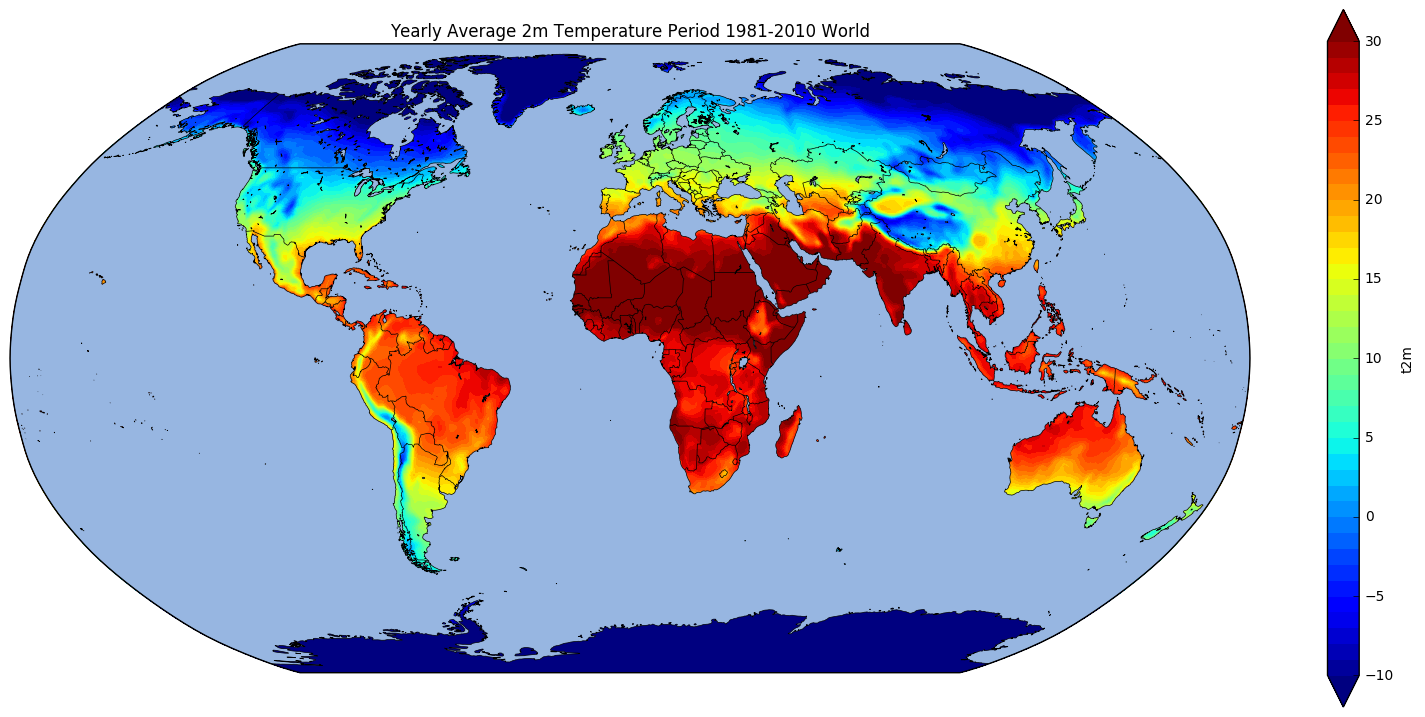

In [74]:
fig = plt.figure(figsize = (20,9))

# set up a map
ax = plt.axes(projection=ccrs.Robinson())

# alpha value
a = 1.
lw = .5

# extend of the map
#ax.set_extent([-15,30,35,60])

# scale of the map
scale = '50m'

# add borders
borders = cfeat.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', scale, facecolor='none', linewidth = lw, alpha = a)
ax.add_feature(borders)

# add lakes
lakes = cfeat.NaturalEarthFeature('physical', 'lakes', scale, edgecolor='black', facecolor= cfeat.COLORS['water'], linewidth = lw, alpha = a)
ax.add_feature(lakes)

# add oceans
ocean = cfeat.NaturalEarthFeature('physical', 'ocean', scale, edgecolor='black', facecolor= cfeat.COLORS['water'], linewidth = lw, alpha = a)
ax.add_feature(ocean)

# plot
data.plot.contourf(ax = ax, transform = ccrs.PlateCarree(), cmap = plt.cm.jet, levels = np.arange(-10,30.1,1), zorder = 0)
#data.plot.contour(ax = ax, transform = ccrs.PlateCarree(), colors = 'black', linewidths = .2, levels = np.arange(5,20.1,1), zorder = 1)

# add title
plt.title('Yearly Average 2m Temperature Period 1981-2010 World')